# Image Augmentation with Masks

In this notebook, we will:
1. Download and load a sample image
2. Create a mask for the image
3. Perform 100 augmentations using albumentations library

/Users/poslam/Downloads/projects/fefu/7/ds/.venv/lib/python3.13/site-packages/albumentations/check_version.py:147: UserWarning: Error fetching version info <urlopen error [Errno 8] nodename nor servname provided, or not known>
  data = fetch_version_info()


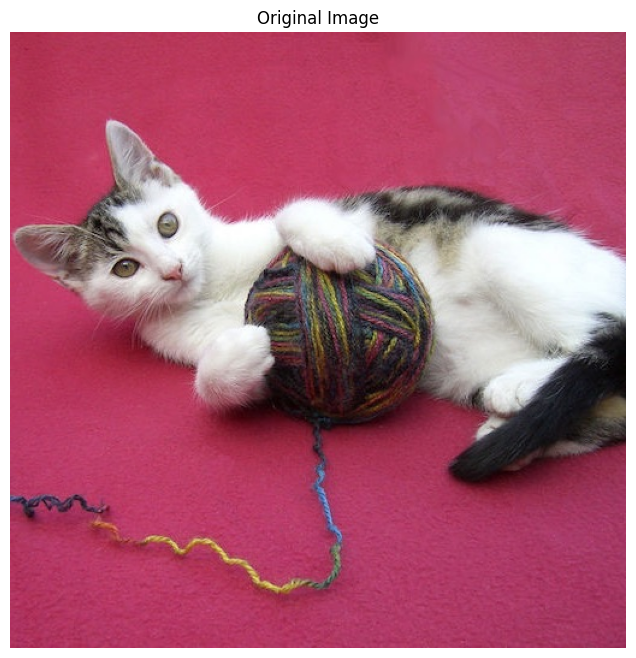

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from urllib.request import urlretrieve
import os

# Download a sample image if it doesn't exist
image_path = "/Users/poslam/Downloads/projects/fefu/7/ds/ml/labs/2/sample_image.jpg"

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

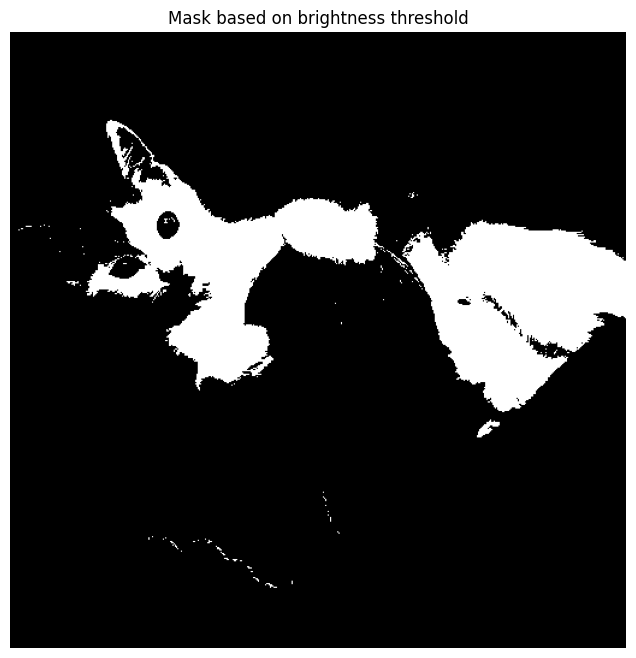

In [2]:
# Загрузка изображения
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, 170, 200, cv2.THRESH_BINARY)

# Показываем результат
plt.figure(figsize=(10, 8))
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("Mask based on brightness threshold")
plt.show()

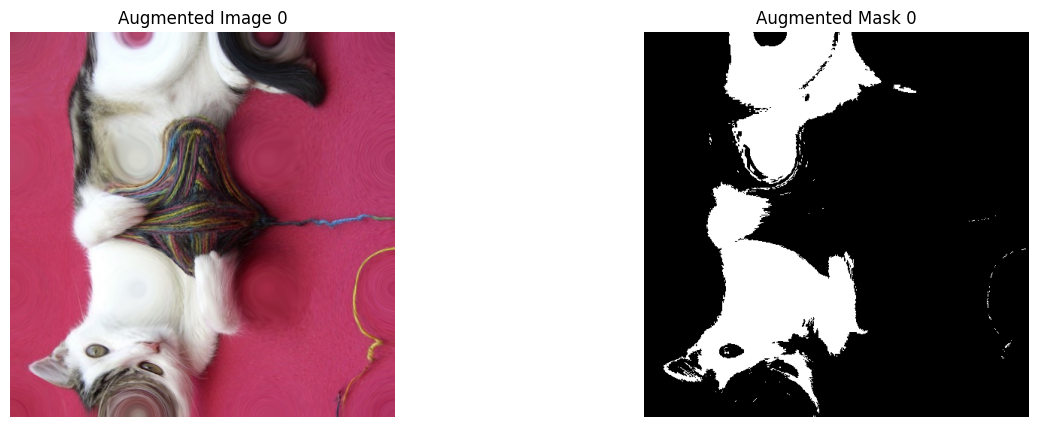

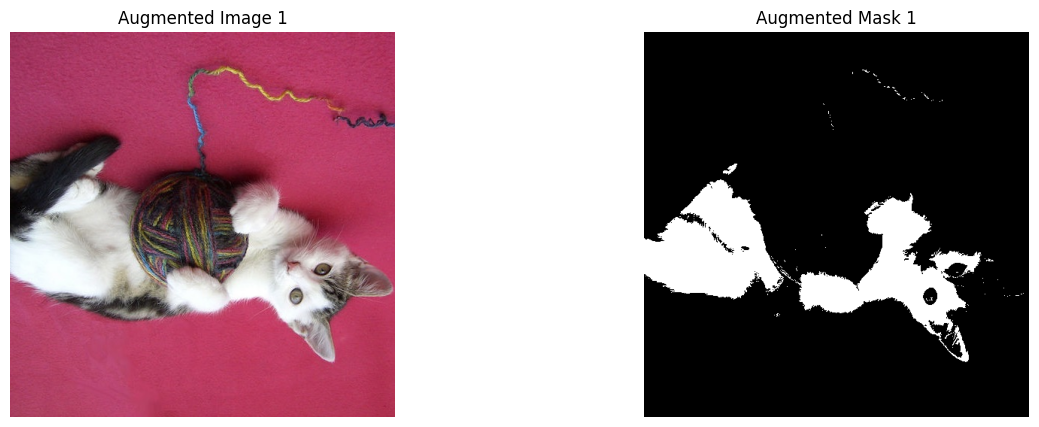

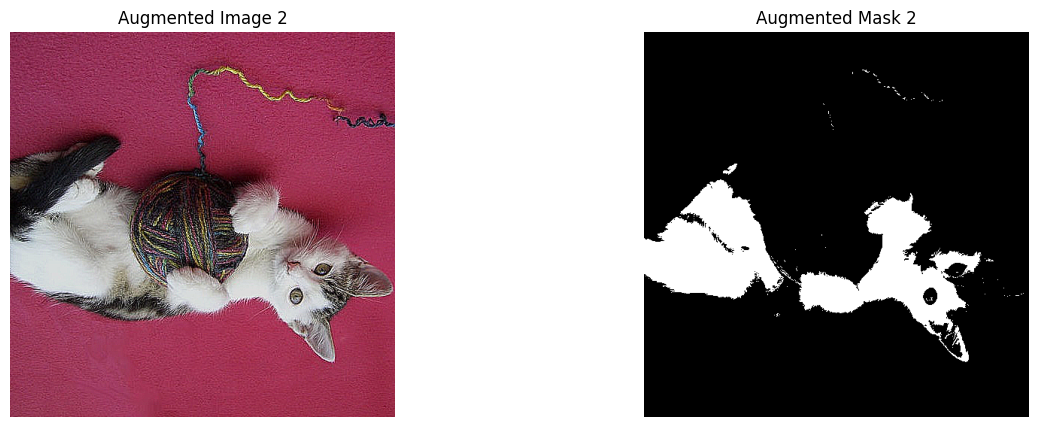

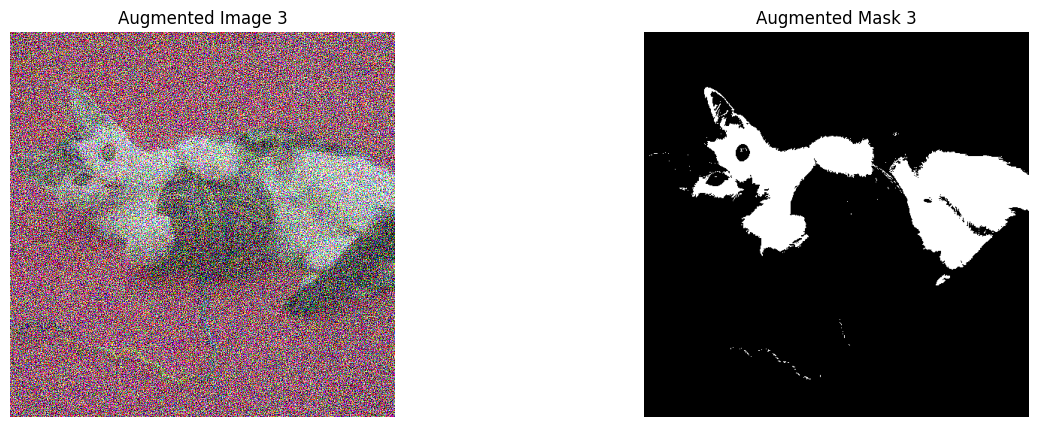

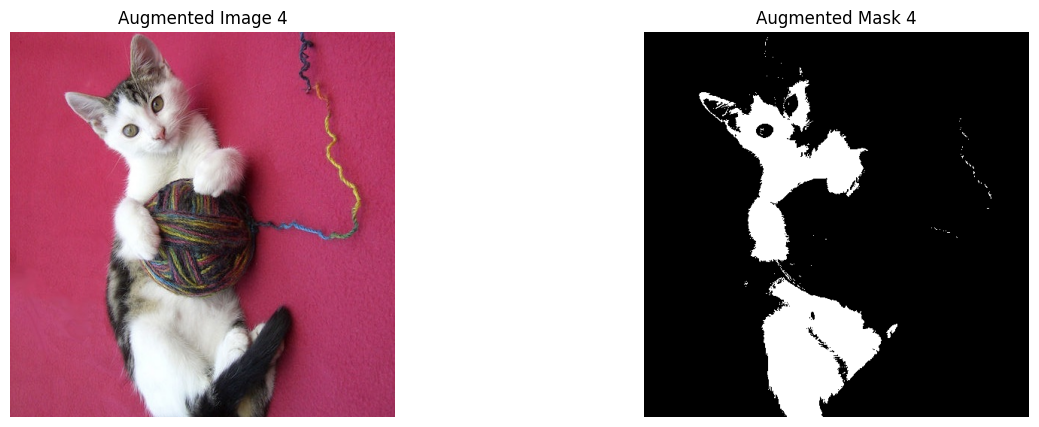

In [4]:
# Define augmentation pipeline
transform = A.Compose(
    [
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Transpose(p=0.5),
        A.OneOf(
            [
                A.GaussNoise(),
                A.GaussNoise(),
            ],
            p=0.2,
        ),
        A.OneOf(
            [
                A.MotionBlur(p=0.2),
                A.MedianBlur(blur_limit=3, p=0.1),
                A.Blur(blur_limit=3, p=0.1),
            ],
            p=0.2,
        ),
        A.ShiftScaleRotate(
            shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2
        ),
        A.OneOf(
            [
                A.OpticalDistortion(p=0.3),
                A.GridDistortion(p=0.1),
                A.PiecewiseAffine(p=0.3),
            ],
            p=0.2,
        ),
        A.OneOf(
            [
                A.CLAHE(clip_limit=2),
                A.Sharpen(),
                A.Emboss(),
                A.RandomBrightnessContrast(),
            ],
            p=0.3,
        ),
        A.HueSaturationValue(p=0.3),
    ]
)

# Create directory for augmented images if it doesn't exist
os.makedirs("augmented_images", exist_ok=True)
os.makedirs("augmented_masks", exist_ok=True)

# Perform augmentations
n_augmentations = 5
for i in range(n_augmentations):
    # Apply augmentation
    augmented = transform(image=image, mask=mask)
    aug_image = augmented["image"]
    aug_mask = augmented["mask"]

    # Save augmented images and masks
    cv2.imwrite(
        f"augmented_images/aug_{i}.jpg",
        cv2.cvtColor(aug_image, cv2.COLOR_RGB2BGR),
    )
    cv2.imwrite(f"augmented_masks/mask_{i}.png", aug_mask)

    # Display every 10th augmentation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.imshow(aug_image)
    ax1.set_title(f"Augmented Image {i}")
    ax1.axis("off")

    ax2.imshow(aug_mask, cmap="gray")
    ax2.set_title(f"Augmented Mask {i}")
    ax2.axis("off")

    plt.show()

In [ ]:
# Print summary
print(f"Augmentation complete!")
print(f"Generated {n_augmentations} augmented images and masks")
print(f"Images saved in: {os.path.abspath('augmented_images')}")
print(f"Masks saved in: {os.path.abspath('augmented_masks')}")